In [181]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [182]:
df = pd.read_csv("jiji_car_dataset.csv")

df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,foreign used,automatic,"₦ 12,850,000"
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,foreign used,automatic,"₦ 15,450,000"
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,local used,automatic,"₦ 14,500,000"
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,local used,automatic,"₦ 13,800,000"
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,foreign used,automatic,"₦ 12,000,000"


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1960 non-null   object 
 1   make          1955 non-null   object 
 2   model         1955 non-null   object 
 3   year          1955 non-null   float64
 4   condition     1960 non-null   object 
 5   transmission  1953 non-null   object 
 6   price         1960 non-null   object 
dtypes: float64(1), object(6)
memory usage: 107.3+ KB


In [184]:
# handling missing values
df.isnull().sum()

title           0
make            5
model           5
year            5
condition       0
transmission    7
price           0
dtype: int64

In [185]:
# checking rows with at least one missing value
df[df.isnull().any(axis=1)]

,title,make,model,year,condition,transmission,price
206,Toyota Corolla LE ECO w/Package 1 4dr Sedan (1...,Toyota,Corolla LE,2017.0,foreign used,NaN,"₦ 17,500,000"
706,Lexus IS 250 2008 Gray,Lexus,IS 250,2008.0,local used,NaN,"₦ 8,000,000"
764,Toyota Corolla S Plus 4dr Sedan (1.8L 4cyl CVT...,Toyota,Corolla S,2015.0,foreign used,NaN,"₦ 13,000,000"
900,Audi Q7 3.0T S line Prestige quattro 4dr SUV A...,NaN,NaN,NaN,foreign used,automatic,"₦ 18,000,000"
1198,Mercedes-Benz M Class ML400 4MATIC 4dr SUV AWD...,NaN,NaN,NaN,foreign used,automatic,"₦ 32,500,000"
1437,Toyota Highlander 2006 Blue,Toyota,Highlander,2006.0,local used,NaN,"₦ 6,200,000"
1565,Ford Edge 2007 Red,Ford,Edge,2007.0,local used,NaN,"₦ 4,800,000"
1633,Mercedes-Benz GL-Class GL450 4MATIC 4dr SUV AW...,NaN,NaN,NaN,foreign used,automatic,"₦ 41,000,000"
1705,Mercedes-Benz M Class ML400 4MATIC 4dr SUV AWD...,NaN,NaN,NaN,foreign used,automatic,"₦ 33,500,000"
1742,Toyota Highlander 2006 Blue,Toyota,Highlander,2006.0,local used,NaN,"₦ 6,200,000"


In [186]:
# dropping rows with missing values
df.dropna(inplace=True)
# df = df.drop(df[df["make"] == "New"].index)
df["make"].unique()

array(['Lexus', 'Hyundai', 'Toyota', 'Mercedes-Benz', 'Honda', 'Kia',
       'Chevrolet', 'Acura', 'Land', 'Ford', 'BMW', 'Skoda', 'Pontiac',
       'Chrysler', 'Dodge', 'Nissan', 'Peugeot', 'Audi', 'Volkswagen',
       'New', 'Daihatsu', 'Mini', 'GMC', 'Porsche', 'Mitsubishi', 'Mazda',
       'Opel', 'Volvo', 'Rolls-Royce', 'Isuzu', 'Rover', 'Lamborghini',
       'Cadillac', 'Jeep', 'Bentley', 'Geely', 'Infiniti'], dtype=object)

In [187]:
# Clean the price column
def clean_currency(x):
    if  isinstance(x, str):
        return float(
            x.replace("₦", "")
            .replace(",", "")
            .strip()
        )
    return x
    
df["price"] = df["price"].apply(clean_currency)
df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,foreign used,automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,foreign used,automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,local used,automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,local used,automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,foreign used,automatic,12000000.0


In [188]:
# check for outliers
num_cols = df[["price"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

price    181
dtype: int64

In [189]:
# Standardise categorical columns
df["condition"] = df["condition"].astype(str).str.capitalize()
df["transmission"] = df["transmission"].astype(str).str.capitalize()

df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,Foreign used,Automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,Foreign used,Automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,Local used,Automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,Local used,Automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,Foreign used,Automatic,12000000.0


In [190]:
# Convert year to integer
df["year"] = df["year"].astype(int)
df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009,Foreign used,Automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015,Foreign used,Automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012,Local used,Automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015,Local used,Automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014,Foreign used,Automatic,12000000.0


In [191]:
# remove invalid year

greater = df[df["year"] > 2025].index
less = df[df["year"] < 1980].index
less

# no year less than 1980  and greater than 2025

Index([], dtype='int64')

In [192]:
# Exploratory Data Analysis (EDA)

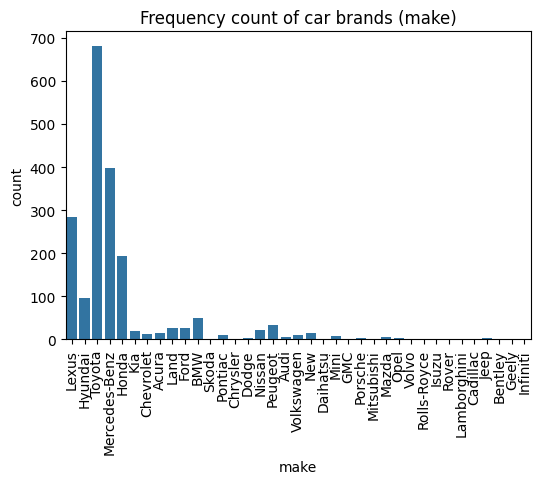

make
Toyota           681
Mercedes-Benz    399
Lexus            284
Honda            193
Hyundai           97
BMW               49
Peugeot           34
Ford              27
Land              26
Nissan            23
Name: title, dtype: int64

In [193]:
# most common car brands (make)
most_car_brands = df.groupby("make")["title"].count().sort_values(ascending=False)


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="make")
plt.title("Frequency count of car brands (make)")
plt.xticks(rotation=90)
plt.show()

most_car_brands.head(10)

In [194]:
# most common models per make
model_counts = df.groupby("make")["model"].value_counts()
most_common_models = model_counts.groupby("make").head(1)
# print(most_common_models)
most_model_by_make = most_common_models.reset_index(name="count")
most_model_by_make

,make,model,count
0,Acura,MDX,7
1,Audi,SQ5 3,2
2,BMW,3 Series,9
3,Bentley,S-Type,2
4,Cadillac,Escalade,1
5,Chevrolet,Camaro,3
6,Chrysler,300C,1
7,Daihatsu,Terios 1,1
8,Dodge,Charger,3
9,Ford,Focus,5


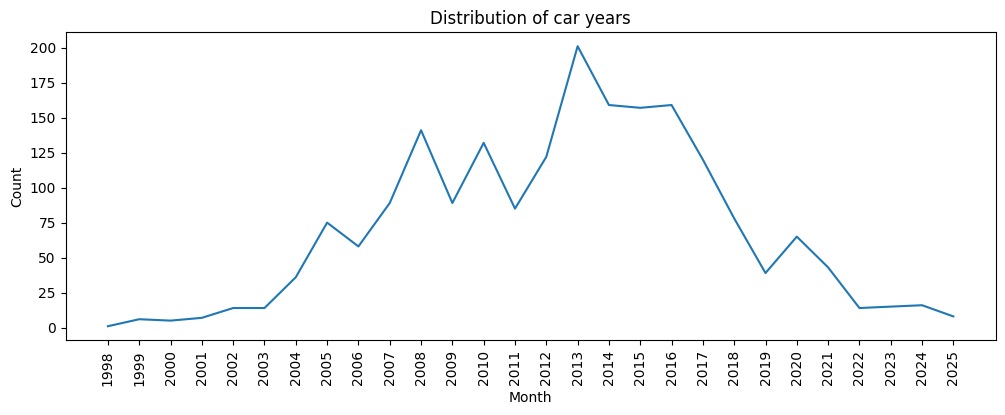

year
1998      1
1999      6
2000      5
2001      7
2002     14
2003     14
2004     36
2005     75
2006     58
2007     89
2008    141
2009     89
2010    132
2011     85
2012    122
2013    201
2014    159
2015    157
2016    159
2017    120
2018     78
2019     39
2020     65
2021     43
2022     14
2023     15
2024     16
2025      8
Name: title, dtype: int64

In [195]:
# distribution of car years
car_years = df.groupby("year")["title"].count()

plt.figure(figsize=(12, 4))
plt.plot(car_years.index.astype(str), car_years.values)
plt.title("Distribution of car years")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

car_years

In [196]:
# average price by brand and model
# by make
price_make = df.groupby("make")["price"].agg(['mean', 'median'])
price_make = price_make.sort_values(by="mean", ascending=False)
price_make


,mean,median
make,,
Rolls-Royce,7.000000e+08,700000000.0
Lamborghini,5.500000e+08,550000000.0
Bentley,4.250000e+08,425000000.0
New,1.524875e+08,97500000.0
Cadillac,1.050000e+08,105000000.0
Jeep,7.783333e+07,105000000.0
Land,4.931538e+07,39500000.0
Mercedes-Benz,3.869998e+07,25500000.0
Dodge,2.895000e+07,30400000.0


In [197]:
# by model
price_model = df.groupby("model")["price"].agg(['mean', 'median'])
price_model = price_model.sort_values(by="mean", ascending=False)
price_model

,mean,median
model,,
Cullinan,1.200000e+09,1.200000e+09
Urus Base,5.500000e+08,5.500000e+08
Brabus G,4.550000e+08,4.550000e+08
S-Type,4.250000e+08,4.250000e+08
Lexus LX,3.483333e+08,2.950000e+08
...,...,...
Accord Automatic,2.800000e+06,2.800000e+06
Primera,2.350000e+06,2.350000e+06
Passat 1,2.300000e+06,2.300000e+06


               count          mean           std         min         25%  \
condition                                                                  
Foreign used  1147.0  3.329365e+07  5.316932e+07   3750000.0  14500000.0   
Local used     785.0  1.126295e+07  1.041621e+07   1700000.0   5500000.0   
New             16.0  1.524875e+08  1.152464e+08  45000000.0  72750000.0   

                     50%          75%           max  
condition                                            
Foreign used  21500000.0   36150000.0  1.200000e+09  
Local used     8000000.0   12500000.0  7.800000e+07  
New           97500000.0  202500000.0  4.550000e+08  


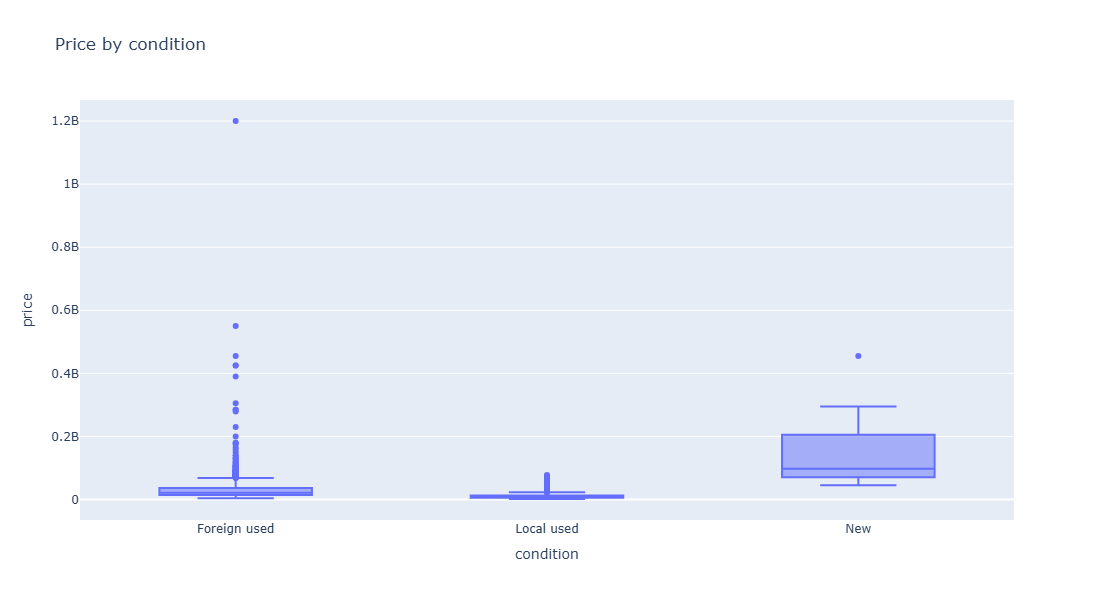

In [201]:
# How car condition affect price
print(df.groupby("condition")["price"].describe())

fig = px.box(
    df,
    x="condition",
    y="price",
    title="Price by condition"
    # points="all"
)
fig.update_layout(width=600, height=600)
fig.show()

# plt.figure(figsize=(6,4))
# sns.boxplot(data=df, x="condition", y="price")
# plt.title("Price by condition")
# plt.show()

In [199]:
# how transmission type affect price
print(df.groupby("transmission")["price"].describe())

# the average price shows that automatic car are generally pricier

               count          mean           std        min        25%  \
transmission                                                             
Automatic     1903.0  2.584834e+07  4.581621e+07  1800000.0  9000000.0   
Manual          45.0  6.214444e+06  5.431470e+06  1700000.0  3600000.0   

                     50%         75%           max  
transmission                                        
Automatic     15000000.0  27000000.0  1.200000e+09  
Manual         4500000.0   6500000.0  2.600000e+07  


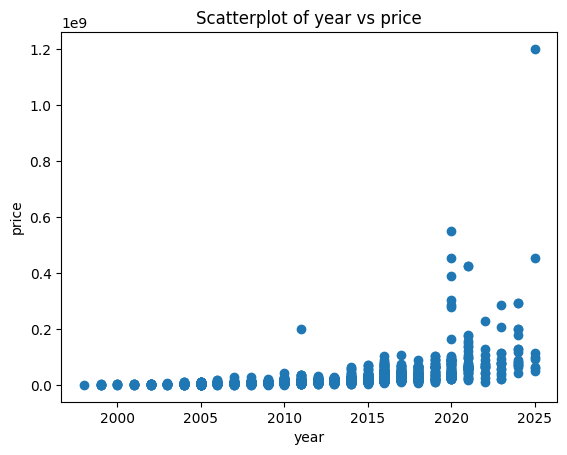

In [204]:
# Are newer cars significantly more expensive
plt.scatter(df['year'], df['price'])
plt.xlabel("year")
plt.ylabel("price")
plt.title("Scatterplot of year vs price")
plt.show()

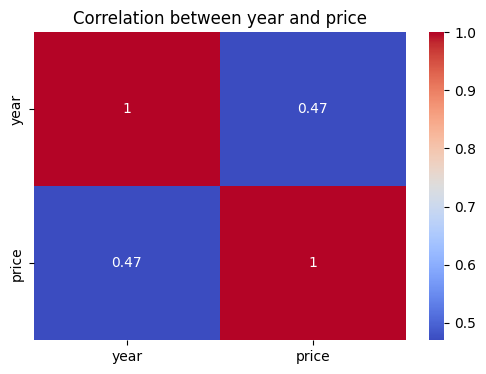

In [206]:
# Correlation coefficient between year and price
corr = df[["year", "price"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correlation between year and price")
plt.show()

In [207]:
# # most common car brands (make)
# fig = px.bar(
#     df,
#     x="make",
#     title="Frequency count of car brands (make)"
# )
# fig.update_traces(marker_color="skyblue")
# fig.update_layout(width=600, height=400)
# fig.show()